# BibRec

### RF Features: Country, State, Age, Year-of-Publication

In [1]:
from bibrec.server.Utils import get_books, get_users, get_ratings

books = get_books("data/BX-Books.csv")
users = get_users("data/BX-Users.csv")
ratings = get_ratings("data/BX-Book-Ratings.csv")

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path, sep=";", encoding="latin-1")


With NaN values 34.862889904962536
used mean values 34.88423426608261


/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
explicit_ratings = ratings[ratings.book_rating != 0]
explicit_ratings

,user_id,isbn,book_rating,isbn13
1,276726,0155061224,5,9780155061224
3,276729,052165615X,3,9780521656153
4,276729,0521795028,6,9780521795029
6,276736,3257224281,8,9783257224283
7,276737,0600570967,6,9780600570967
...,...,...,...,...
1149771,276704,0743211383,7,9780743211383
1149773,276704,0806917695,5,9780806917696
1149775,276704,1563526298,9,9781563526299
1149777,276709,0515107662,10,9780515107661


In [4]:
df_ratings = explicit_ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
df_ratings = df_ratings[:1000]
df_ratings = df_ratings.reset_index()
# user_id => nr of ratings
df_ratings = df_ratings.drop('user_id',axis=1)
df_ratings

,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780679781585
...,...
995,978038000148
996,9780671695071
997,9780684853529
998,9780394223803


In [5]:
df_ratings = df_ratings.merge(explicit_ratings, on='isbn13', how='left')
df_ratings

,isbn13,user_id,isbn,book_rating
0,9780316666343,277439,0316666343,7
1,9780316666343,277752,0316666343,7
2,9780316666343,278633,0316666343,9
3,9780316666343,638,0316666343,10
4,9780316666343,709,0316666343,3
...,...,...,...,...
68510,9780446679367,223787,0446679364,7
68511,9780446679367,226267,0446679364,8
68512,9780446679367,242574,0446679364,8
68513,9780446679367,260099,0446679364,4


In [6]:
# merge book dataset
df_ratings = df_ratings.merge(books[['isbn13', 'year_of_publication']])
df_ratings

,isbn13,user_id,isbn,book_rating,year_of_publication
0,9780316666343,277439,0316666343,7,2002.0
1,9780316666343,277752,0316666343,7,2002.0
2,9780316666343,278633,0316666343,9,2002.0
3,9780316666343,638,0316666343,10,2002.0
4,9780316666343,709,0316666343,3,2002.0
...,...,...,...,...,...
71362,9780446679367,223787,0446679364,7,2002.0
71363,9780446679367,226267,0446679364,8,2002.0
71364,9780446679367,242574,0446679364,8,2002.0
71365,9780446679367,260099,0446679364,4,2002.0


In [7]:
# merge user dataset
df_ratings = df_ratings.merge(users[['user_id', 'country', 'state', 'age']])
df_ratings

,isbn13,user_id,isbn,book_rating,year_of_publication,country,state,age
0,9780316666343,277439,0316666343,7,2002.0,usa,oregon,65.000000
1,9780671027360,277439,0671027360,7,2001.0,usa,oregon,65.000000
2,9780316666343,277752,0316666343,7,2002.0,usa,louisiana,18.000000
3,9780679734772,277752,0679734775,8,1991.0,usa,louisiana,18.000000
4,9780316666343,278633,0316666343,9,2002.0,usa,utah,12.052853
...,...,...,...,...,...,...,...,...
71362,9780684853529,241011,0684853523,8,2000.0,usa,texas,45.000000
71363,9780446679367,15783,0446679364,6,2002.0,usa,montana,37.984388
71364,9780446679367,129135,0446679364,8,2002.0,NaN,oregon,37.146330
71365,9780446679367,204414,0446679364,9,2002.0,usa,illinois,42.000000


In [8]:
df = df_ratings

<AxesSubplot: >

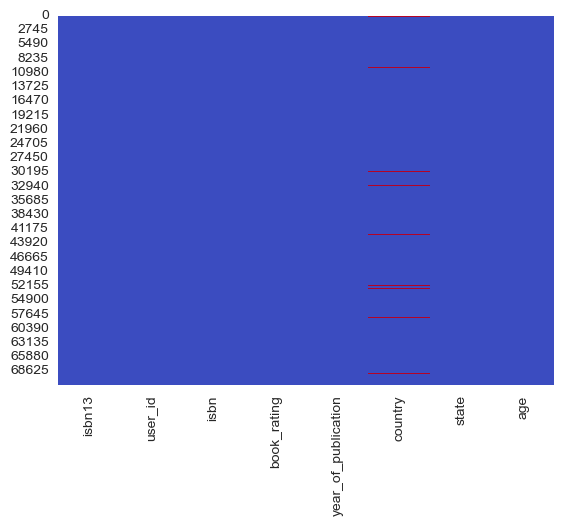

In [9]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False, cmap='coolwarm')

In [10]:
country = pd.get_dummies(df['country'],drop_first=True)
country

,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,austria,bahamas,...,worcester,ysa,yugoslavia,zambia,zimbabwe,", denmark",", malaysia",", mexico",", new zealand",", portugal"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
state = pd.get_dummies(df['state'],drop_first=True)
state

,&#322;ódzkie,(alacant),*,-,.,...,"\n/a\""",\n/a`,_,aargau,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = pd.concat([df, country, state], axis = 1)
df

,isbn13,user_id,isbn,book_rating,year_of_publication,country,state,age,"\n/a\"", greece""",albania,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,9780316666343,277439,0316666343,7,2002.0,usa,oregon,65.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780671027360,277439,0671027360,7,2001.0,usa,oregon,65.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780316666343,277752,0316666343,7,2002.0,usa,louisiana,18.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780679734772,277752,0679734775,8,1991.0,usa,louisiana,18.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,278633,0316666343,9,2002.0,usa,utah,12.052853,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71362,9780684853529,241011,0684853523,8,2000.0,usa,texas,45.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
71363,9780446679367,15783,0446679364,6,2002.0,usa,montana,37.984388,0,0,...,0,0,0,0,0,0,0,0,0,0
71364,9780446679367,129135,0446679364,8,2002.0,NaN,oregon,37.146330,0,0,...,0,0,0,0,0,0,0,0,0,0
71365,9780446679367,204414,0446679364,9,2002.0,usa,illinois,42.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df = df.loc[:,~df.columns.duplicated()]
df

,isbn13,user_id,isbn,book_rating,year_of_publication,country,state,age,"\n/a\"", greece""",albania,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,9780316666343,277439,0316666343,7,2002.0,usa,oregon,65.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9780671027360,277439,0671027360,7,2001.0,usa,oregon,65.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9780316666343,277752,0316666343,7,2002.0,usa,louisiana,18.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9780679734772,277752,0679734775,8,1991.0,usa,louisiana,18.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,278633,0316666343,9,2002.0,usa,utah,12.052853,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71362,9780684853529,241011,0684853523,8,2000.0,usa,texas,45.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
71363,9780446679367,15783,0446679364,6,2002.0,usa,montana,37.984388,0,0,...,0,0,0,0,0,0,0,0,0,0
71364,9780446679367,129135,0446679364,8,2002.0,NaN,oregon,37.146330,0,0,...,0,0,0,0,0,0,0,0,0,0
71365,9780446679367,204414,0446679364,9,2002.0,usa,illinois,42.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = df.drop(['isbn', 'isbn13', 'user_id', 'country', 'state'], axis = 1)
df

,book_rating,year_of_publication,age,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,7,2002.0,65.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,2001.0,65.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,2002.0,18.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,1991.0,18.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,2002.0,12.052853,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71362,8,2000.0,45.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71363,6,2002.0,37.984388,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71364,8,2002.0,37.146330,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71365,9,2002.0,42.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df.drop('book_rating', axis = 1) #Features
X

,year_of_publication,age,"\n/a\"", greece""",albania,algeria,antarctica,argentina,aroostook,aruba,australia,...,zuid-holland,zuidholland,zurich,zürich,álava,maryland,new york,or,tn,town of bali
0,2002.0,65.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001.0,65.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2002.0,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1991.0,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2002.0,12.052853,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71362,2000.0,45.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71363,2002.0,37.984388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71364,2002.0,37.146330,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71365,2002.0,42.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Y = df['book_rating']   # Target Variables
Y

0        7
1        7
2        7
3        8
4        9
        ..
71362    8
71363    6
71364    8
71365    9
71366    8
Name: book_rating, Length: 71367, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [18]:
rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

In [20]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred)*100)

              precision    recall  f1-score   support

           1       0.09      0.05      0.07        95
           2       0.05      0.05      0.05       125
           3       0.10      0.07      0.09       285
           4       0.08      0.06      0.07       355
           5       0.25      0.21      0.22      1852
           6       0.15      0.13      0.14      1635
           7       0.23      0.23      0.23      3473
           8       0.31      0.35      0.33      5371
           9       0.24      0.24      0.24      4001
          10       0.32      0.34      0.33      4219

    accuracy                           0.27     21411
   macro avg       0.18      0.17      0.18     21411
weighted avg       0.26      0.27      0.26     21411

26.621829900518424


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[   5    3    1    1    6    4   10   24   21   20]
 [   1    6    2    3    9   14   23   38   14   15]
 [   2    8   21    5   28   14   45   72   42   48]
 [   1    7    4   22   25   30   51   94   61   60]
 [   8   10   19   25  382  117  269  444  248  330]
 [   3   10   20   19  123  206  277  447  251  279]
 [  10   17   39   54  230  205  810  915  580  613]
 [  16   18   46   60  298  294  845 1857  995  942]
 [   3   16   29   53  235  248  588 1086  954  789]
 [   8   15   22   50  221  212  532  990  732 1437]]


In [ ]:
rfc.score(X_train, y_train)

In [ ]:
feature_importance = pd.DataFrame({'Feature_names':X.columns,'Importances':rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances',ascending=False)
feature_importance

In [ ]:
plt.bar(feature_importance['Feature_names'],feature_importance['Importances'])
plt.show()

In [ ]:
import pickle

# Save the model to a file
with open("random_forest_classifier.pkl", "wb") as file:
    pickle.dump(rfc, file)

In [ ]:
# Load the model from the file
with open("random_forest_classifier.pkl", "rb") as file:
    random_forest_classifier_loaded = pickle.load(file)